In [1]:
import numpy as np

# Ориентировочное титрование кобальта
# Скачок с 5 до 6 мл => титруем по каплям с 4 до 7

# Точное титрование кобальта

x1 = [1, 2, 3, 4]
y1 = [-11.0, -7.9, -4.8, -1.2]

x2 = [2, 4, 6, 8, 10, 12 , 14, 16, 18, 20, 
      21, 22, 23, 24, 25, 26, 27, 28, 29, 30,31, 33, 34, 35, 36,
     38, 40, 42, 44, 46]
y2 = [-0.9, 
      -0.7, 
      -0.5, 
      -0.2, 
      0,
      0.3,
      0.6,
      1,
      1.7,
      2.7,
      3.2,
      3.7,
      4.4,
      4.9,
      5.9,
      7.2,
      8.9,
      11.3,
      15.3,
      20.8,
      34.5,
      62.2,
      118.3,
      152,
      168.7,
      184.6, 
      195.3,
      202.7, 
      209.6,
      214.1]

x3 = [7, 8, 9, 10]
y3 = [233.8, 247.2, 255.2, 261.5]

k = (6.2 - 4)/46
print(k)



y = y1; x =x1



for i in range(len(x2)):
    x.append(x2[i]* k + 4)
    y.append(y2[i])
    
    
for i in range(len(x3)):
    x.append(x3[i])
    y.append(y3[i])

x = np.array(x); y = np.array(y)
    
print(x2,y)



0.04782608695652174
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 38, 40, 42, 44, 46] [-1.100e+01 -7.900e+00 -4.800e+00 -1.200e+00 -9.000e-01 -7.000e-01
 -5.000e-01 -2.000e-01  0.000e+00  3.000e-01  6.000e-01  1.000e+00
  1.700e+00  2.700e+00  3.200e+00  3.700e+00  4.400e+00  4.900e+00
  5.900e+00  7.200e+00  8.900e+00  1.130e+01  1.530e+01  2.080e+01
  3.450e+01  6.220e+01  1.183e+02  1.520e+02  1.687e+02  1.846e+02
  1.953e+02  2.027e+02  2.096e+02  2.141e+02  2.338e+02  2.472e+02
  2.552e+02  2.615e+02]


V_ktt = 5.602173913043478
m = 0.08253822880434782
0.04782608695652174


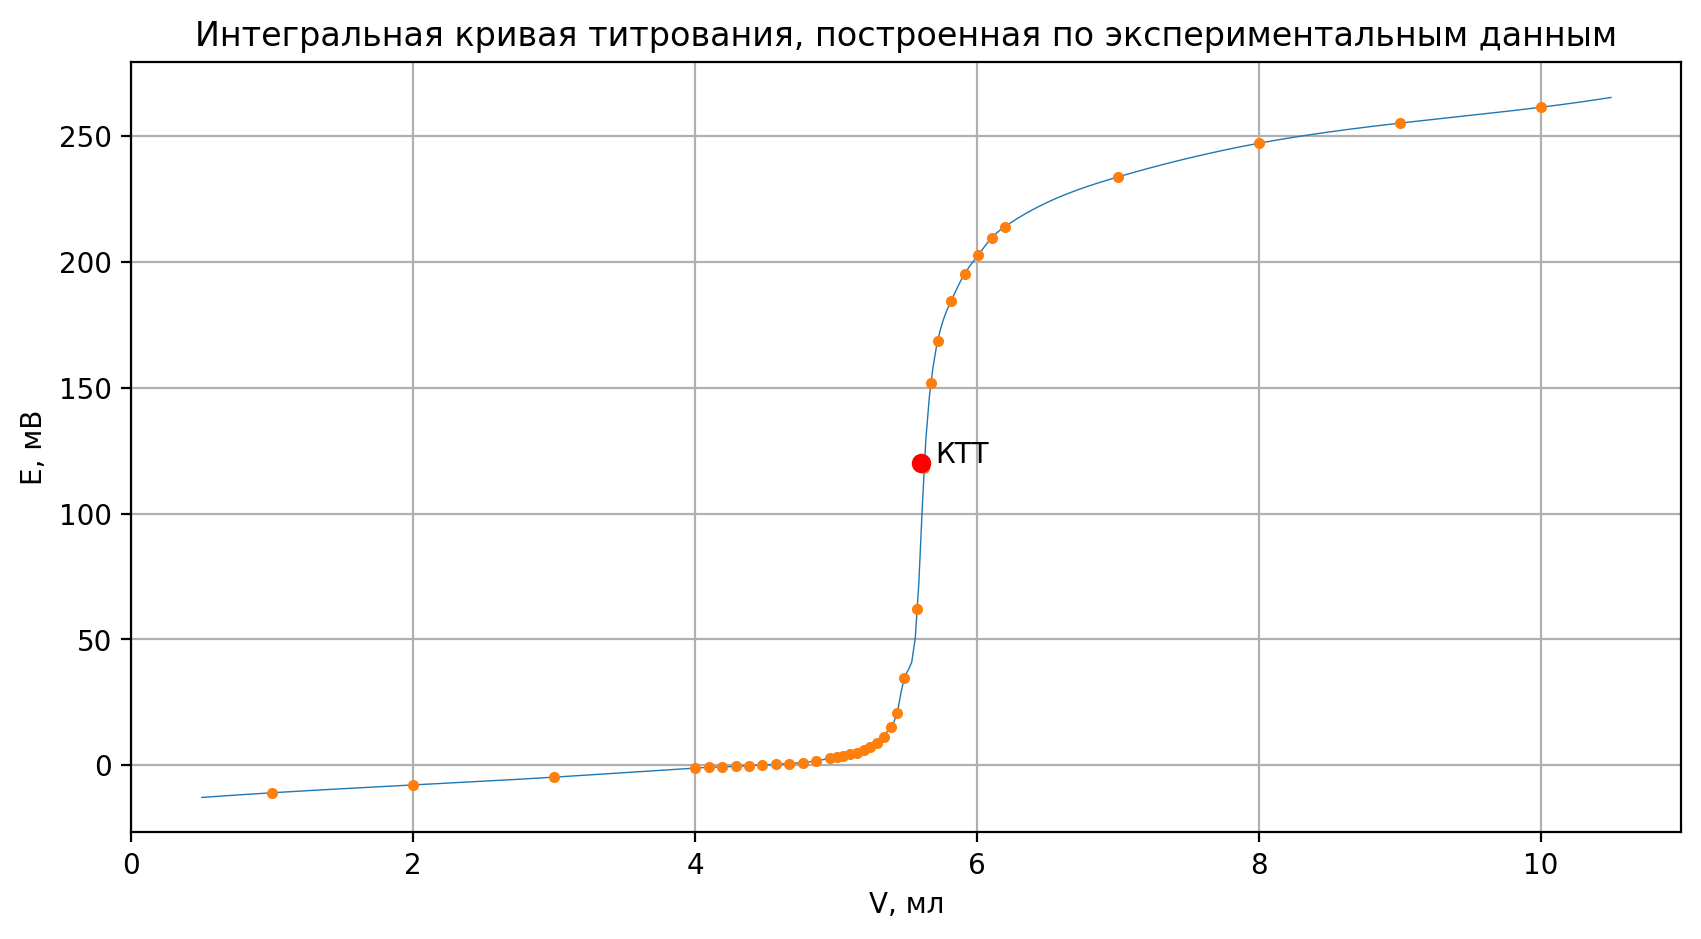

In [2]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt


def leastsq(x,y):
    if len(x)!=len(y): print("Массивы разной длины")
    n = len(x);
    sumx = np.sum(x);
    sumy = np.sum(y);
    sumxy = np.sum(x*y);
    sumx2 = np.sum(x**2);
    M = np.array([[sumx2,sumx],
                 [sumx,n]]);
    v = np.array([sumxy,sumy]);
    a,b = np.linalg.solve(M,v);
    return a,b

spline = CubicSpline(x,y)
x_spline = np.linspace(0.5,10.5, 400)

ax = plt.figure(figsize = (10,5), dpi = 200)
plt.plot(x_spline, spline(x_spline),
        linewidth = 0.5)


V_ktt = (x[25] + x[26])/2

plt.plot(x,y, ".",)
plt.grid(True)
plt.xlabel("V, мл")
plt.ylabel("E, мВ")
plt.plot(V_ktt,120,
        'o', color = 'r')
plt.text(V_ktt + 0.1,120, "КТТ")
plt.title("Интегральная кривая титрования, построенная по экспериментальным данным")
#plt.legend()

import tikzplotlib as tikz

def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

tikzplotlib_fix_ncols(ax)

tikz.save("../Obsidian/teeest22.tex", 
          axis_width = "\\textwidth - 3cm",
          axis_height = "8.5cm")

print(f"V_ktt = {V_ktt}")
m = V_ktt * 100 * 0.025 * 58.933/ (10 * 1000)
print(f"m = {m}")
print(k)

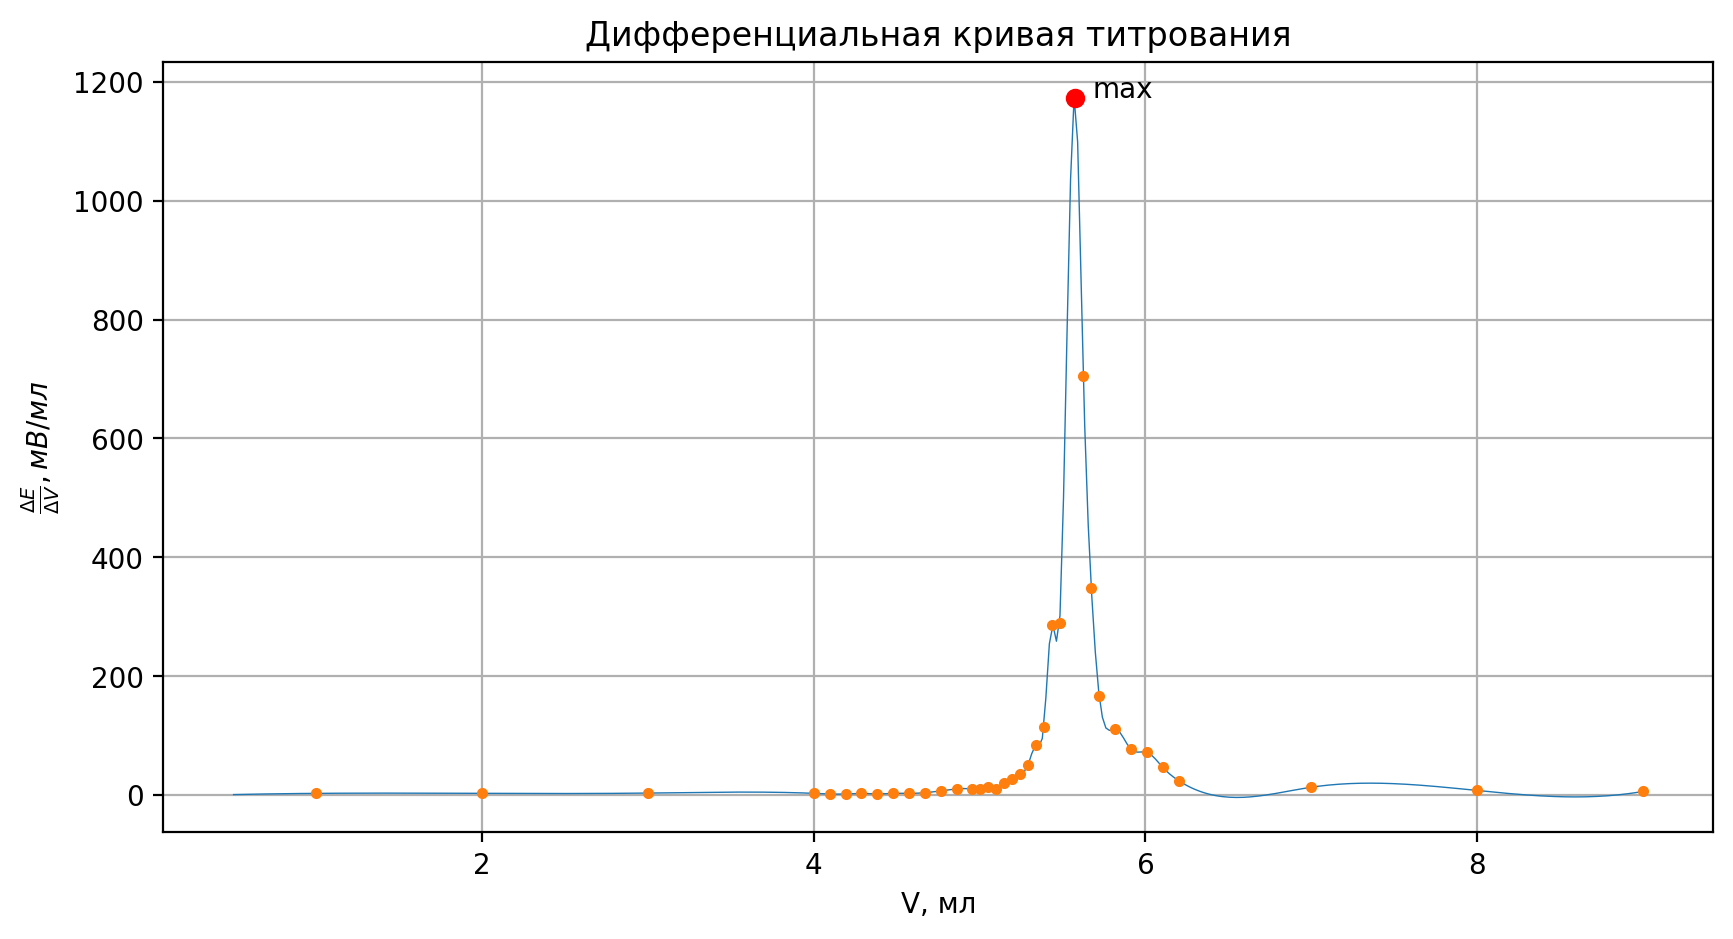

5.578260869565217


In [4]:
dx = np.ones(len(x) - 1, dtype = float)
dy = np.ones(len(x) - 1, dtype = float)

for i in range(len(dx)):
    dy[i] = (y[i+1] - y[i])/(x[i+1] - x[i])
    dx[i] = x[i]
    
spline = CubicSpline(dx,dy)
x_spline = np.linspace(0.5,9, 400)

plt.figure(figsize = (10,5), dpi = 200)
plt.plot(x_spline, spline(x_spline),linewidth = 0.5)
q = 25
plt.plot(dx,dy, ".",)
plt.plot(x[q],dy[q],
        'o', color = 'r')
plt.text(x[q]+0.1,dy[q],"max")
plt.grid(True)
plt.xlabel("V, мл")
plt.ylabel("$\\frac{\\Delta E}{\\Delta V}, мВ/мл$")
plt.title("Дифференциальная кривая титрования")

import tikzplotlib as tikz

def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

tikzplotlib_fix_ncols(ax)

tikz.save("../Obsidian/Study/analytical chemistry/sup_files/diff titration curve.tex", 
          axis_width = "\\textwidth - 3cm",
          axis_height = "8.5cm")


plt.show()
print(x[q])

In [25]:
x1 = [1, 2, 3, 4]
y1 = [-11.0, -7.9, -4.8, -1.2]

x2 = [2, 4, 6, 8, 10, 12 , 14, 16, 18, 20, 
      21, 22, 23, 24, 25, 26, 27, 28, 29, 30,31, 33, 34, 35, 36,
     38, 40, 42, 44, 46]
y2 = [-0.9, 
      -0.7, 
      -0.5, 
      -0.2, 
      0,
      0.3,
      0.6,
      1,
      1.7,
      2.7,
      3.2,
      3.7,
      4.4,
      4.9,
      5.9,
      7.2,
      8.9,
      11.3,
      15.3,
      20.8,
      34.5,
      62.2,
      118.3,
      152,
      168.7,
      184.6, 
      195.3,
      202.7, 
      209.6,
      214.1]

x3 = [7, 8, 9, 10]
y3 = [233.8, 247.2, 255.2, 261.5]

k = (6.2 - 4)/46
print(r"|V, мл|$N_{\text{капель}}$|E, мВ|$\frac{\Delta E}{\Delta V}, мВ/мл$|")
print(f"|-|-|-|-|")
for i in range(len(x1)):
    print(f"|{x1[i]:.3f}|0|{y1[i]:.1f}|{dy[i]:.3f}|")
for i in range(len(x2)):
    print(f"|{(4+k*x2[i]):.3f}|{x2[i]}|{y2[i]:.1f}|{dy[len(x1)+i]:.3f}|")
for i in range(len(x3)-1):
    print(f"|{x3[i]:.3f}|0|{y3[i]:.1f}|{dy[len(x1)+len(x2)+i]:.3f}|")
print(f"|{x3[-1]:.3f}|0|{y3[-1]:.1f}|0|")
    

|V, мл|$N_{\text{капель}}$|E, мВ|$\frac{\Delta E}{\Delta V}, мВ/мл$|
|-|-|-|-|
|1.000|0|-11.0|3.100|
|2.000|0|-7.9|3.100|
|3.000|0|-4.8|3.600|
|4.000|0|-1.2|3.136|
|4.096|2|-0.9|2.091|
|4.191|4|-0.7|2.091|
|4.287|6|-0.5|3.136|
|4.383|8|-0.2|2.091|
|4.478|10|0.0|3.136|
|4.574|12|0.3|3.136|
|4.670|14|0.6|4.182|
|4.765|16|1.0|7.318|
|4.861|18|1.7|10.455|
|4.957|20|2.7|10.455|
|5.004|21|3.2|10.455|
|5.052|22|3.7|14.636|
|5.100|23|4.4|10.455|
|5.148|24|4.9|20.909|
|5.196|25|5.9|27.182|
|5.243|26|7.2|35.545|
|5.291|27|8.9|50.182|
|5.339|28|11.3|83.636|
|5.387|29|15.3|115.000|
|5.435|30|20.8|286.455|
|5.483|31|34.5|289.591|
|5.578|33|62.2|1173.000|
|5.626|34|118.3|704.636|
|5.674|35|152.0|349.182|
|5.722|36|168.7|166.227|
|5.817|38|184.6|111.864|
|5.913|40|195.3|77.364|
|6.009|42|202.7|72.136|
|6.104|44|209.6|47.045|
|6.200|46|214.1|24.625|
|7.000|0|233.8|13.400|
|8.000|0|247.2|8.000|
|9.000|0|255.2|6.300|
|10.000|0|261.5|0|


[1.32032701e-06 1.88969258e+01 3.61371033e+01 4.68146781e+01
 6.64484758e+01 7.54947790e+01 8.82101235e+01 1.00000000e+02]
-17181.055152443107 6.3590143591200095
-16053.25800083733 5.473663574181394


/tmp/ipykernel_3705/4286446035.py:104: RuntimeWarning: divide by zero encountered in divide
  p = dfa/nf * w_nf/w_dfa
/tmp/ipykernel_3705/4286446035.py:106: RuntimeWarning: invalid value encountered in divide
  xi = p / (1+p) * 100; xi[-1] =100


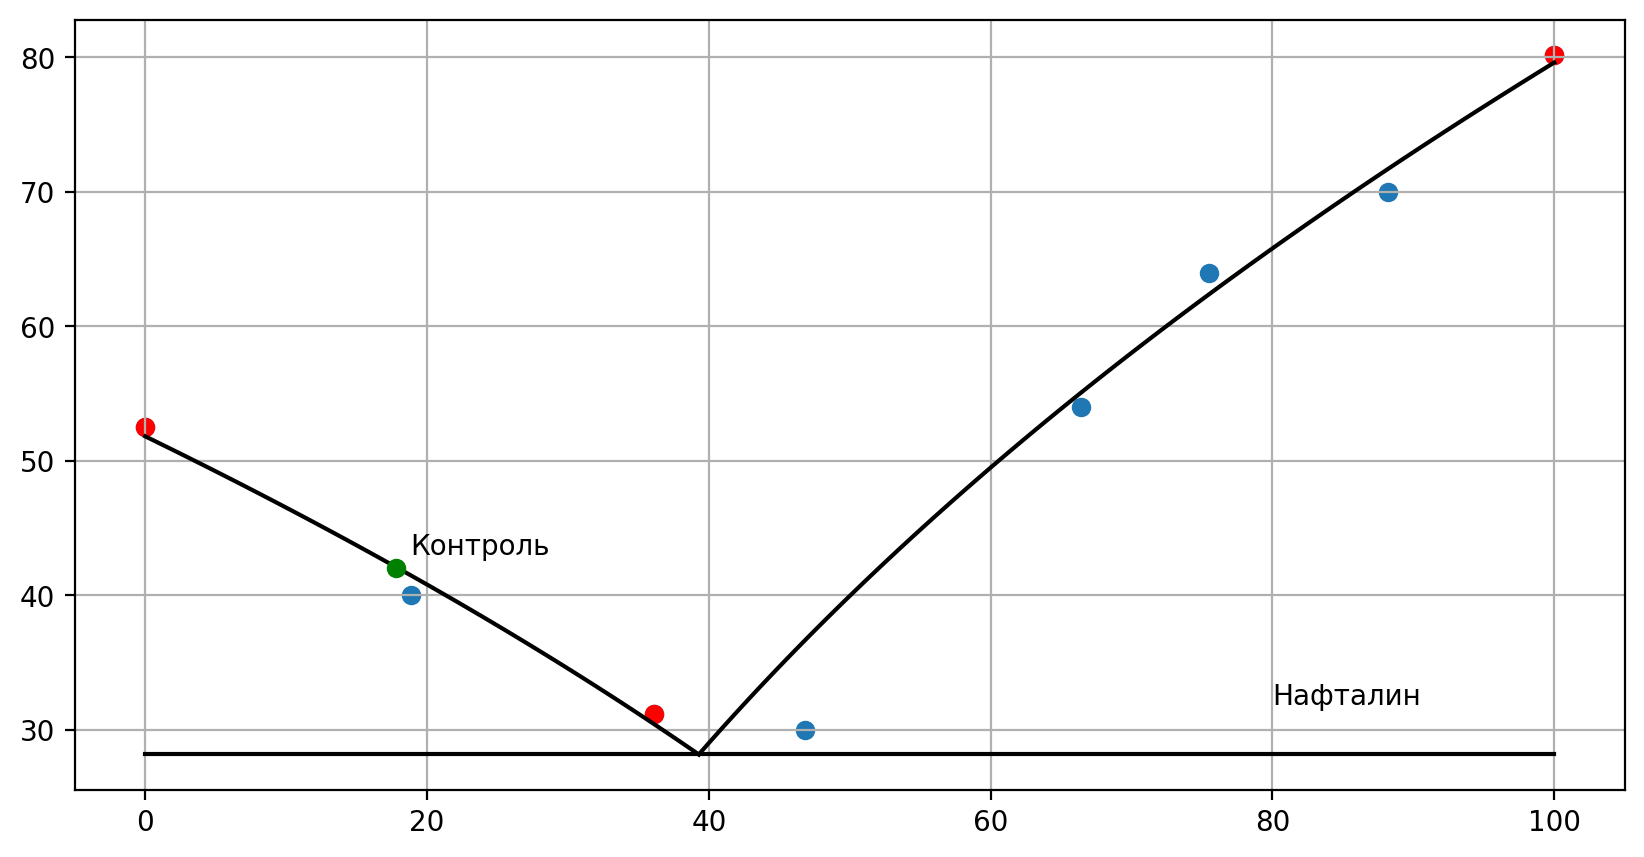


```text
\begin{figure}[H]
\centering
[[8d0baf7e-e3af-4f16-8ba4-14407ac47561.tex]]
\end{figure}
```


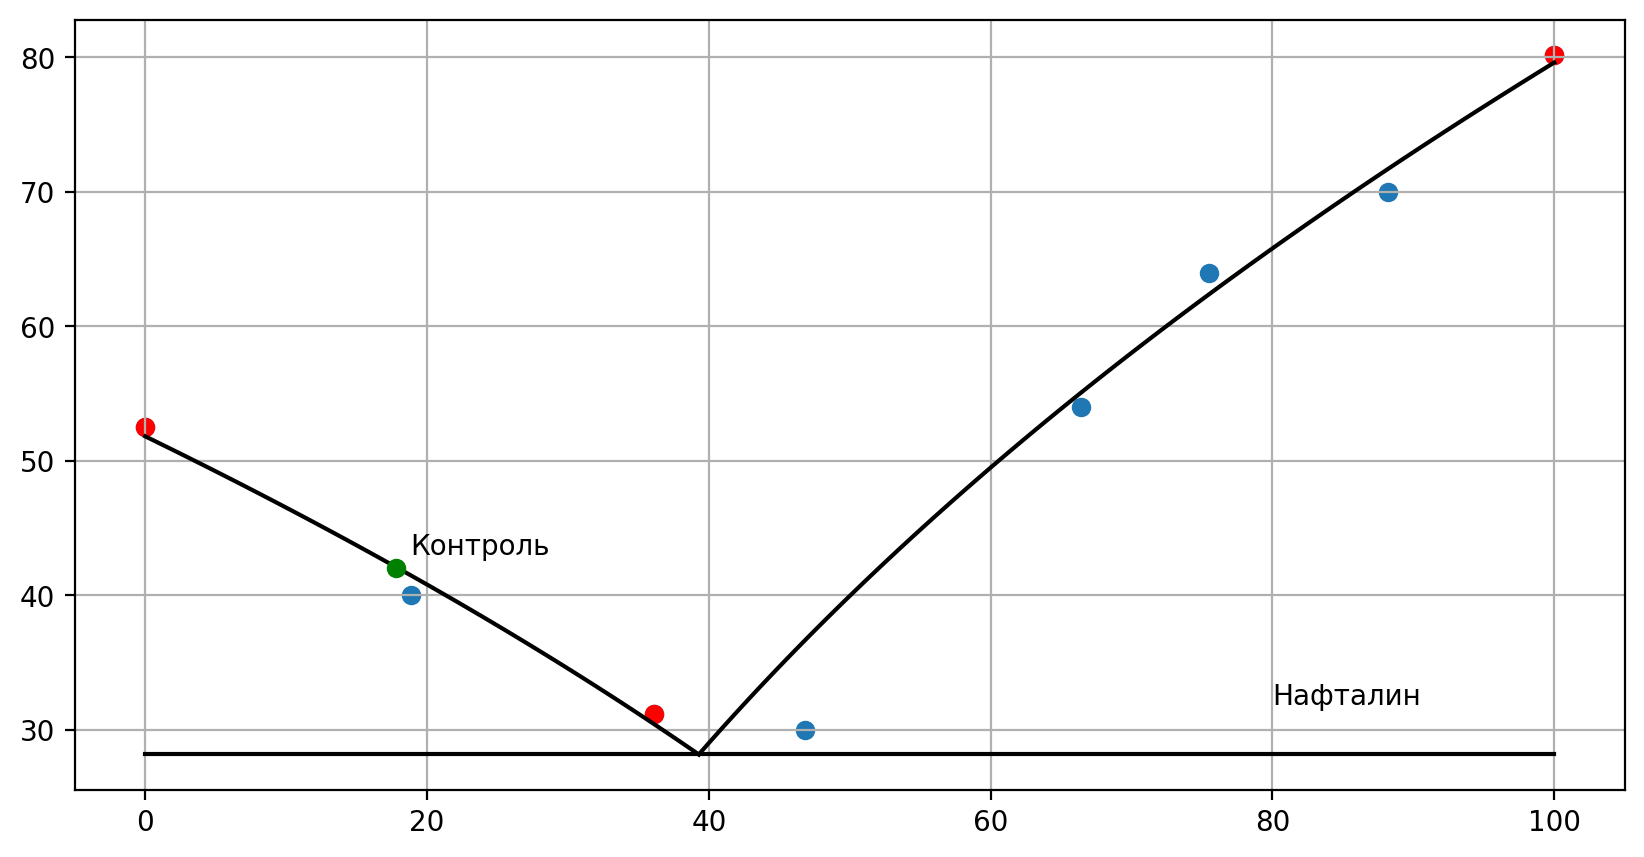

<Figure size 640x480 with 0 Axes>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import tikzplotlib as tikz
import os
import uuid

def leastsq(x,y):
    if len(x)!=len(y): print("Массивы разной длины")
    n = len(x);
    sumx = np.sum(x);
    sumy = np.sum(y);
    sumxy = np.sum(x*y);
    sumx2 = np.sum(x**2);
    M = np.array([[sumx2,sumx],
                 [sumx,n]]);
    v = np.array([sumxy,sumy]);
    a,b = np.linalg.solve(M,v);
    return a,b

##########

def tikz_convert(ax, mktex = False, path = "", filename = ""):
    
    num = len(ax.get_axes()) 
    if num != 1:
        num = 2
    
    if filename == "":
        import uuid
        filename = str(uuid.uuid4()) + ".tex"
        
    if path == "":
        path = "../Obsidian"
    
    if mktex:
    
        

        def tikzplotlib_fix_ncols(obj):
            """
            workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
            """
            if hasattr(obj, "_ncols"):
                obj._ncol = obj._ncols
            for child in obj.get_children():
                tikzplotlib_fix_ncols(child)

        tikzplotlib_fix_ncols(ax)

        
        #ax = tikz.clean_figure(ax)
        
        tikz.save(f"{path}/{filename}", 
                axis_width = f"\\textwidth/{num} - 2cm",
                axis_height = "8.5cm")

        print(f"""
```text
\\begin{{figure}}[H]
\\centering
[[{filename}]]
\\end{{figure}}
```""")
    
    return ax

##########

def spline_borders(x, y, 
                  left = -np.inf, right = np.inf,
                  color = "g", linewidth = 1,
                  xlabel = "", ylabel ="", title = "",
                  mktex = False, path = "", filename = ""):
    
    spline  = CubicSpline(x,y)
    
    x = np.array(x); y = np.array(y)
    mask = (x < right) & (x > left)
    x = x[mask]; y = y[mask]
    
    x_graph = np.linspace(left,right, 1000)
    y_graph = spline(x_graph)
    
    plt.plot(x,y,".", color = color)
    plt.plot(x_graph,y_graph,color = color, linewidth = linewidth)
    plt.grid(True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    #tikz(ax,
    #    mktex = mktex, path = path, filename = filename)

    return spline


from scipy.optimize import root

w_nf = np.array([0.000001, 15, 30, 40, 60, 70, 85, 100])
w_dfa = 100 - w_nf
dfa = 169.227
nf = 128.17052
p = dfa/nf * w_nf/w_dfa

xi = p / (1+p) * 100; xi[-1] =100
print(xi)
T = [52.5,40,31.2,30,54,64,70,80.2]
#xi = [0, 0.12, 0.34, 0.53, 0.64, 0.81,1]

x1 = xi[0:3]; t1 = T[0:3]
x2 = xi[3:];  t2 = T[3:]

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Экспериментальные данные
T1 = np.array([52.5,40,31.2]) + 273.15  # температуры в К
x1 = 1 - np.array([0, 1.88969258e+01, 3.61371033e+01])/100  # значения x_i
T2 = np.array([31.2,30,54,64,70,80.2]) + 273.15
x2 = np.array([3.61371033e+01,4.68146781e+01, 6.64484758e+01, 7.54947790e+01, 8.82101235e+01, 1.00000000e+02])/100



# Известные константы
R = 8.314  # Дж/(моль·К)

def y(x,k,b): return k*x + b
division = 0.393


T0 = 52.5
popt1, pcov = curve_fit(y,1/T1,np.log(x1))
x_1 = np.linspace(0, division, 100)
y_1 = popt1[0] / (np.log(1 - x_1) - popt1[1])

print(popt1[0]*R, popt1[1])


def a(x,k,b):
    return k / (np.log(x) - b)

def a1(x):
    return a(x,popt1[0],popt1[1]) - a(x,popt2[0],popt[1])

T0 = 80.2
popt2, pcov = curve_fit(y,1/T2,np.log(x2))
x_2 = np.linspace(division,1,100)
y_2 = popt2[0] / (np.log(x_2) - popt2[1])
print(popt2[0]*R, popt2[1])



ax = plt.figure(figsize = (10,5), dpi = 200)


plt.scatter(xi,np.array(T), label = "Экспериментальные данные")

plt.scatter([xi[0],xi[2],xi[-1]],[T[0],T[2],T[-1]],
           color = "red", label = "Справочные значения")
plt.plot(x_2*100,y_2-273.15,
        color = "black")
plt.plot(x_1*100,y_1-273.15,
        color = "black")


plt.plot(np.linspace(0,1,2)*100,np.ones(2)*y_2[0]-273.15,
        color = "black")
plt.text(0.178*100+1,42+1,"Контроль"); plt.plot(0.178*100,42,"o",color = "g")
plt.text(0.8*100,305-273.15, "Нафталин")
plt.text(0.05*100,305-273.15, "Дифениламин")
plt.plot(39.24,28,"o", color = "g")
plt.xlabel(r"$\chi_{{НФТ}}$")
plt.ylabel(r"$T,\ ^\circ C$")
plt.legend()
plt.grid(True)
plt.show()


#tikz.save(f"../Obsidian/phase.tex", 
#                axis_width = f"\\textwidth - 2cm",
 #               axis_height = "8.5cm")

tikz_convert(ax, mktex = True)

